# **Studying Mass segregation ComBer**

Libraries imported and some parameters adjusted for plots.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rc('axes', titlesize=30) #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels

A function to transform the apparent magnitudes to absolute magnitudes is defined. Since we know the distance between the Sun and the object ($44\, kpc$), this is simple.

In [2]:
def app_2_abs(app, d=44):
    output = app + 5 - (5 * np.log(d))
    return output

Data is imported as a dataframe, some cleaning is done (double quotes removed) and then columns of interest are created.

In [3]:
# Data is imported
df = pd.read_csv("comber_calib_cut.csv", header=5, sep="\s+|\t+|\s+\t+|\t+\s+")  # sep is in that way to skip any number of whitespaces.

# Double quotes are removed
df.rename(columns = {'"id':'id', 'ar"':'ar'}, inplace = True)
df['id'] = df['id'].apply(lambda x : str(x.strip('"')))  # id's will be strings
df['ar'] = df['ar'].apply(lambda x : float(x.strip('"')))

# Column with G-R 
df.insert(7, 'g-r', df.g - df.r, True)
# Column with absolute magnitudes
df.insert(8, 'g_abs', df.g.apply(app_2_abs), True)
df.insert(9, 'r_abs', df.r.apply(app_2_abs), True)

/tmp/ipykernel_316/4108730057.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("comber_calib_cut.csv", header=5, sep="\s+|\t+|\s+\t+|\t+\s+")  # sep is in that way to skip any number of whitespaces.


In [ ]:
df

,id,ra,dec,g,gerr,r,rerr,g-r,g_abs,r_abs,chi,sharp,rd,l,b,egr,ag,ar
0,10100003,12.447312,23.907527,24.3179,0.0195,23.8523,0.0136,0.4656,10.396952,9.931352,1.0030,-0.0490,1.846,241.707,83.585,0.0180,0.0655,0.0475
1,10100005,12.447323,23.892127,25.1297,0.0368,24.2765,0.0205,0.8532,11.208752,10.355552,1.0546,0.6885,2.350,241.825,83.577,0.0177,0.0646,0.0468
2,10100006,12.447303,23.923080,26.0262,0.1231,26.0150,0.0691,0.0112,12.105252,12.094052,0.9873,-0.5051,1.732,241.587,83.593,0.0182,0.0662,0.0480
3,10100009,12.447394,23.794176,21.8796,0.0035,21.6566,0.0037,0.2230,7.958652,7.735652,1.0722,-0.0589,7.677,242.570,83.526,0.0174,0.0634,0.0460
4,10100010,12.447456,23.721257,25.2733,0.0780,24.8299,0.0692,0.4434,11.352352,10.908952,1.0343,-0.2550,11.981,243.117,83.487,0.0187,0.0680,0.0493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468368,43202664,12.415582,23.991854,24.4273,0.1016,24.9415,0.1078,-0.5142,10.506352,11.020552,1.2900,-0.1455,28.156,239.159,83.251,0.0213,0.0774,0.0562
468369,43202668,12.415611,23.953061,24.2112,0.0872,24.1556,0.0841,0.0556,10.290252,10.234652,1.5450,0.3005,27.866,239.448,83.233,0.0212,0.0773,0.0561
468370,43202680,12.415555,23.992610,23.4898,0.0499,23.6784,0.0461,-0.1886,9.568852,9.757452,1.6085,-0.1065,28.185,239.152,83.251,0.0213,0.0774,0.0561
468371,43202680,12.415469,24.071748,23.4464,0.0423,23.5796,0.0466,-0.1332,9.525452,9.658652,1.5130,0.2070,29.372,238.555,83.288,0.0202,0.0736,0.0534


Some first ideas:
* Since there are objects with more than 1 detection, the **mean** of each column for each object will be taken so we have a dataframe with unique id's. According to Ricardo, this is not true, and the reason for having repeated id's is a previous problem related to assigning id's. The line to take the mean was `df_mean = df.groupby('id').apply(lambda df_aux: df_aux.mean()).reset_index(drop=True)`
* Add column with colors (difference between bands: g-r)

### **Color Magnitud Diagram (CMD)**

In this section, the entirety of the dataframe is used.

Two functions are created:
* `plot_cmd`: Makes a plot of the CMD, with filter at all
* `plot_cmd_radius`: Makes a plot of the CMD, separating two regions by a radius (parameter)

In [ ]:
def plot_cmd(df):
    x_data = df['g-r']
    y_data = df['g_abs']
    
    fig, ax = plt.subplots(figsize=(10,9))
    ax.scatter(x_data, y_data, s=.05, c='k')#, alpha=0.1)
    ax.set_title('CMD')
    ax.set_ylabel('G')
    ax.set_xlabel('G-R')
    #ax.set_xlim((-2, 2))
    ax.set_ylim(ax.get_ylim()[::-1])

def plot_cmd_radius(df, radius):
    inner_mask = df.rd <= radius

    df_inner = df.loc[inner_mask]
    x_inner = df_inner['g-r']
    y_inner = df_inner['g_abs']
    
    df_outer = df.loc[~inner_mask]
    x_outer = df_outer['g-r']
    y_outer = df_outer['g_abs']

    fig, axs = plt.subplots(1, 2, figsize=(20,9))
    axs[0].scatter(x_inner, y_inner, s=.05, c='k')#, alpha=0.1)
    axs[1].scatter(x_outer, y_outer, s=.05, c='k')#, alpha=0.1)
    axs[0].set_title('CMD for $r\leq$' + str(radius))
    axs[1].set_title('CMD for $r>$' + str(radius))
    for ax in axs:
        ax.set_ylabel('G')
        ax.set_xlabel('G-R')
        #ax.set_xlim((-.5, 2))
        #ax.set_ylim((18, 26))
        ax.set_ylim(ax.get_ylim()[::-1])

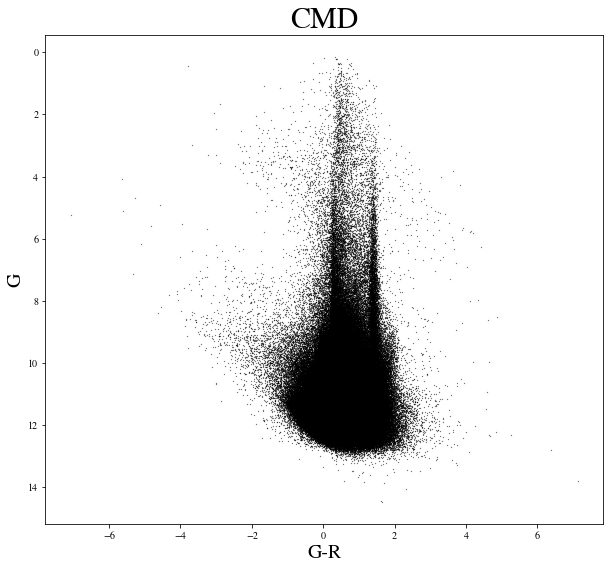

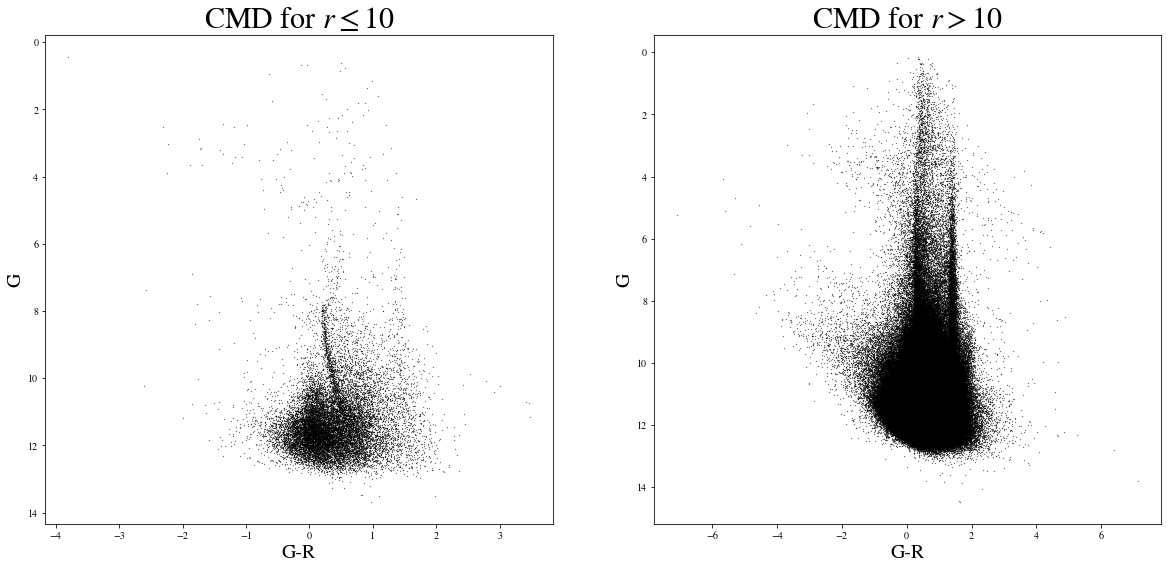

In [ ]:
r_inner = 10

plot_cmd(df)
plot_cmd_radius(df, r_inner)

### **Exploring parameters**

Since the target is to select the stars of the object (cluster or galaxy), the parameters "$\chi$" and "sharp" are of interest. 

* Sharp: If I trust my memory, this parameter gives us information about the shape of the object.
* Chi: I don't remember :c


In [ ]:
def plot_sharp(df):
    fig, axs = plt.subplots(1, 2, figsize=(20,9))
    
    axs[0].scatter(df.g_abs, df.sharp, s=.05, c='k')
    axs[1].scatter(df.r_abs, df.sharp, s=.05, c='k')

    axs[0].set_title('G vs Sharp')
    axs[1].set_title('R vs Sharp')

    axs[0].set_ylabel('G')
    axs[1].set_ylabel('R')
    
    axs[0].set_xlabel('Sharp')
    axs[1].set_xlabel('Sharp')

    
def plot_chi(df):
    fig, axs = plt.subplots(1, 2, figsize=(20,9))
    
    axs[0].scatter(df.g_abs, df.chi, s=.05, c='k')
    axs[1].scatter(df.r_abs, df.chi, s=.05, c='k')

    axs[0].set_title(r'G vs $\chi$')
    axs[1].set_title(r'R vs $\chi$')

    axs[0].set_ylabel('G')
    axs[1].set_ylabel('R')

    axs[0].set_xlabel(r'$\chi$')
    axs[1].set_xlabel(r'$\chi$')

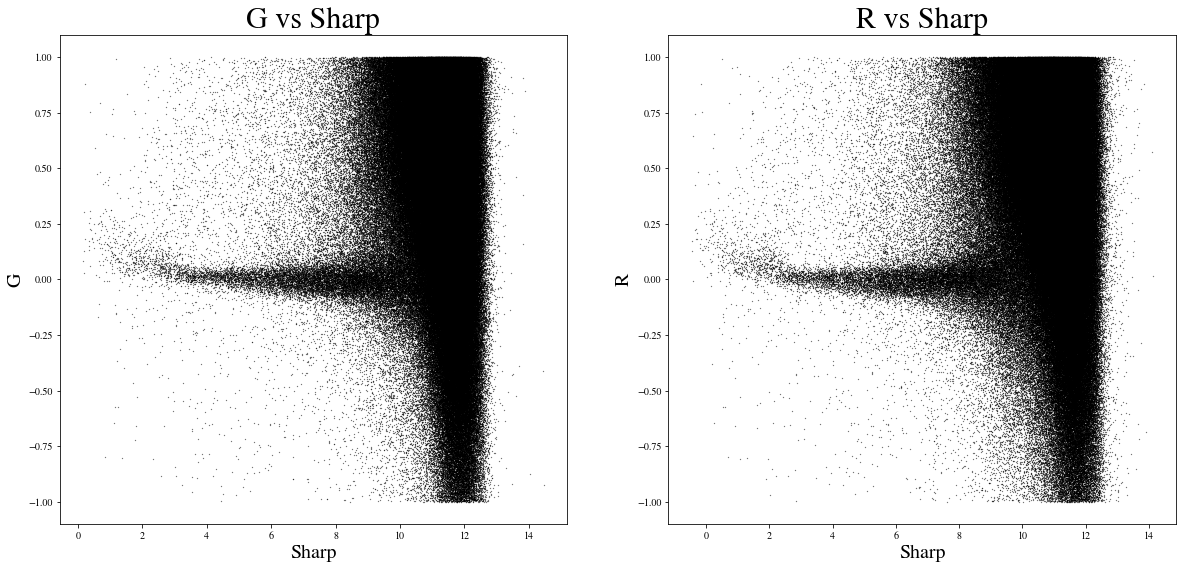

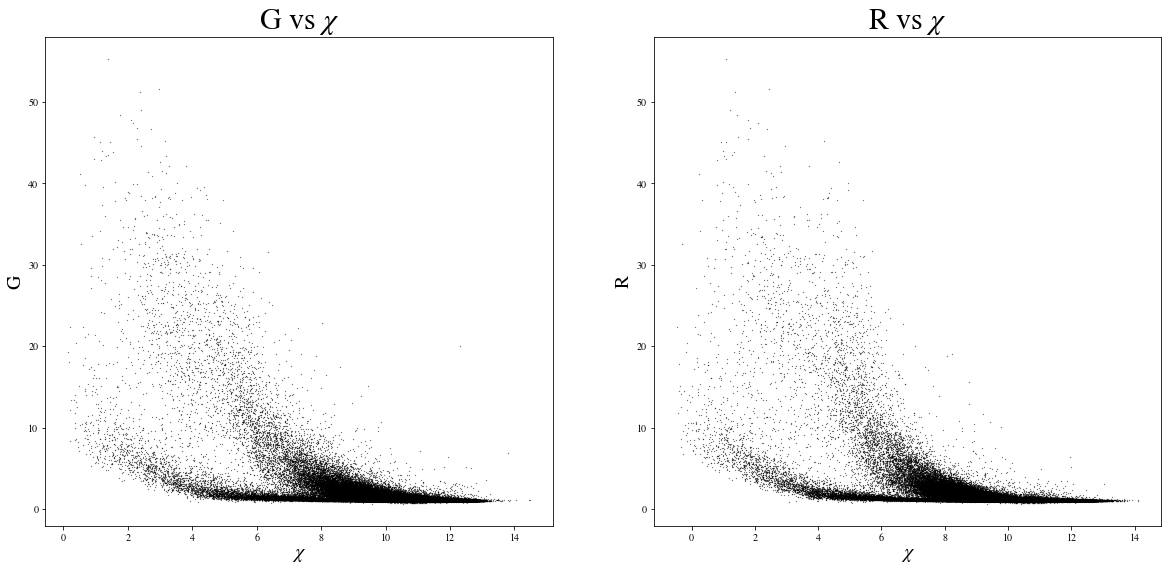

In [ ]:
plot_sharp(df)
plot_chi(df)

### Filtered CMD

In [ ]:
mask = (np.abs(df.sharp) < .25) & (df.chi < 1.3)
df_filtered = df.loc[mask]

df_filtered

,id,ra,dec,g,gerr,r,rerr,g-r,g_abs,r_abs,chi,sharp,rd,l,b,egr,ag,ar
0,10100003,12.447312,23.907527,24.3179,0.0195,23.8523,0.0136,0.4656,10.396952,9.931352,1.0030,-0.0490,1.846,241.707,83.585,0.0180,0.0655,0.0475
3,10100009,12.447394,23.794176,21.8796,0.0035,21.6566,0.0037,0.2230,7.958652,7.735652,1.0722,-0.0589,7.677,242.570,83.526,0.0174,0.0634,0.0460
12,10100034,12.447364,23.933602,25.1854,0.0494,24.4479,0.0355,0.7375,11.264452,10.526952,1.1522,0.0008,1.877,241.510,83.599,0.0183,0.0666,0.0483
14,10100036,12.447370,23.931447,23.1923,0.0074,22.8859,0.0061,0.3064,9.271352,8.964952,1.0427,0.0078,1.817,241.527,83.598,0.0183,0.0665,0.0482
15,10100039,12.447413,23.875267,24.7283,0.0239,23.3527,0.0091,1.3756,10.807352,9.431752,1.0441,-0.1346,3.095,241.959,83.569,0.0174,0.0632,0.0459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468350,43202576,12.415910,23.958836,25.1935,0.1375,24.9515,0.1198,0.2420,11.272552,11.030552,1.2010,0.0125,27.648,239.423,83.239,0.0213,0.0776,0.0562
468352,43202580,12.415903,23.951389,24.3504,0.0759,24.5933,0.0803,-0.2429,10.429452,10.672352,1.1960,-0.0815,27.619,239.477,83.235,0.0213,0.0774,0.0561
468354,43202588,12.415923,23.882000,24.4425,0.0604,23.8431,0.0481,0.5994,10.521552,9.922152,1.1565,-0.1870,27.625,239.989,83.201,0.0209,0.0761,0.0552
468361,43202624,12.415663,24.058544,24.4471,0.0748,24.4670,0.0724,-0.0199,10.526152,10.546052,1.1470,0.0410,28.982,238.665,83.285,0.0204,0.0742,0.0538


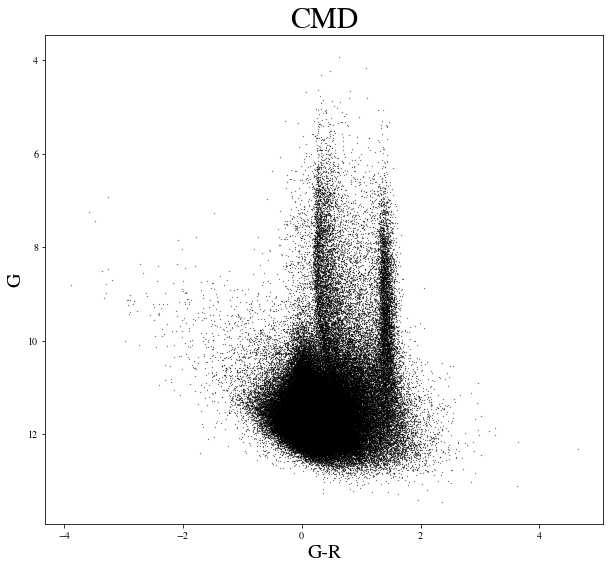

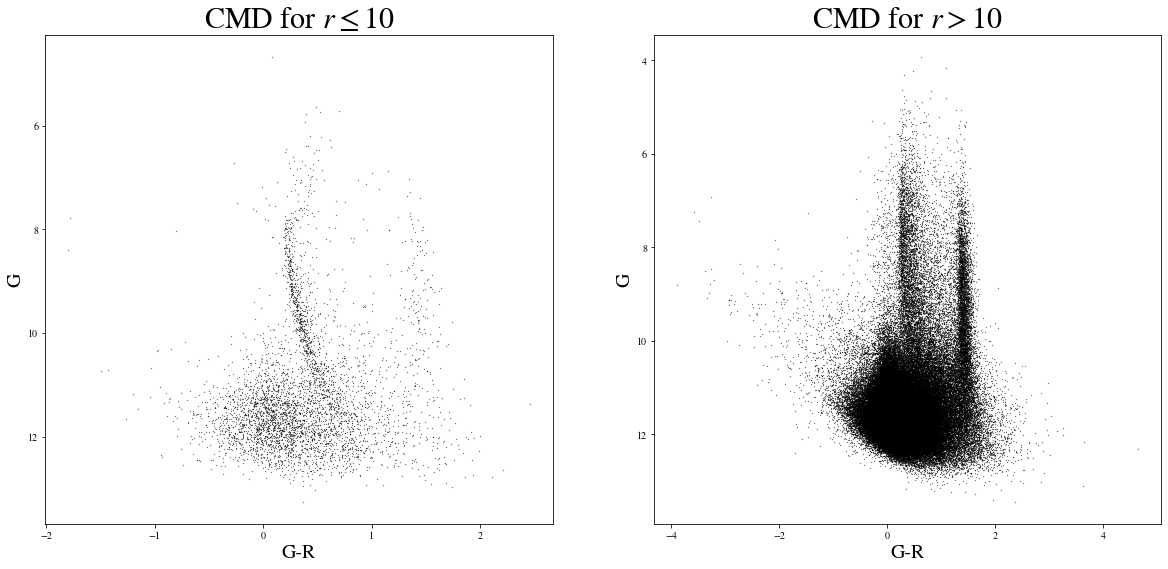

In [ ]:
r_inner = 10

plot_cmd(df_filtered)
plot_cmd_radius(df_filtered, r_inner)

### **Matching isochrones to CMD**

Data from isochrones was obtained in the [Dartmouth](http://stellar.dartmouth.edu/models/isolf_new.html) website.

In [ ]:
# Data is imported into dataframes
df_iso1 = pd.read_csv("Isochrones/tmp1665768190.txt", header=8, sep="\s+|\t+|\s+\t+|\t+\s+");
df_iso2 = pd.read_csv("Isochrones/tmp1665769168.txt", header=8, sep="\s+|\t+|\s+\t+|\t+\s+");
df_iso3 = pd.read_csv("Isochrones/tmp1665769246.txt", header=8, sep="\s+|\t+|\s+\t+|\t+\s+");

/tmp/ipykernel_326/564096726.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_iso1 = pd.read_csv("Isochrones/tmp1665768190.txt", header=8, sep="\s+|\t+|\s+\t+|\t+\s+");
/tmp/ipykernel_326/564096726.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_iso2 = pd.read_csv("Isochrones/tmp1665769168.txt", header=8, sep="\s+|\t+|\s+\t+|\t+\s+");
/tmp/ipykernel_326/564096726.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying eng

In [ ]:
# G-R columns are inserted into the dataframe
df_iso1.insert(10, 'g-r', df_iso1.sdss_g - df_iso1.sdss_r, True)
df_iso2.insert(10, 'g-r', df_iso2.sdss_g - df_iso2.sdss_r, True)
df_iso3.insert(10, 'g-r', df_iso3.sdss_g - df_iso3.sdss_r, True)

In [ ]:
df_iso1['sdss_g']

0      13.8308
1      13.3886
2      12.9447
3      12.5295
4      12.1818
        ...   
262    -1.8792
263    -1.9210
264    -1.9608
265    -1.9990
266    -2.0349
Name: sdss_g, Length: 267, dtype: float64

In [ ]:
def isochrone_cmd(df_cmd, df_iso):
    x_cmd = df_cmd['g-r']
    y_cmd = df_cmd['g']
    
    x_iso = df_iso['g-r']
    y_iso = df_iso['sdss_g']

    fig, ax = plt.subplots(figsize=(10,9))
    ax.scatter(x_cmd, y_cmd, s=.05, c='k')
    ax.scatter(x_iso + 0.055, y_iso + 18.5, s=.05, c='r')
    ax.set_title('CMD')
    ax.set_ylabel('G')
    ax.set_xlabel('G-R')
    #ax.set_xlim((-2, 2))
    ax.set_ylim(ax.get_ylim()[::-1])

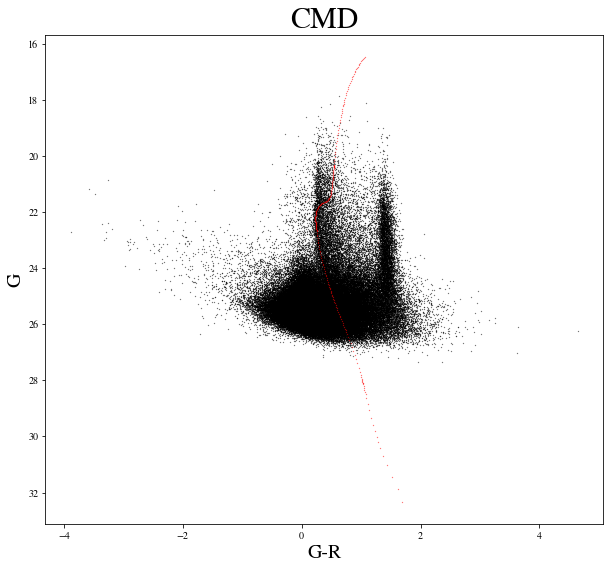

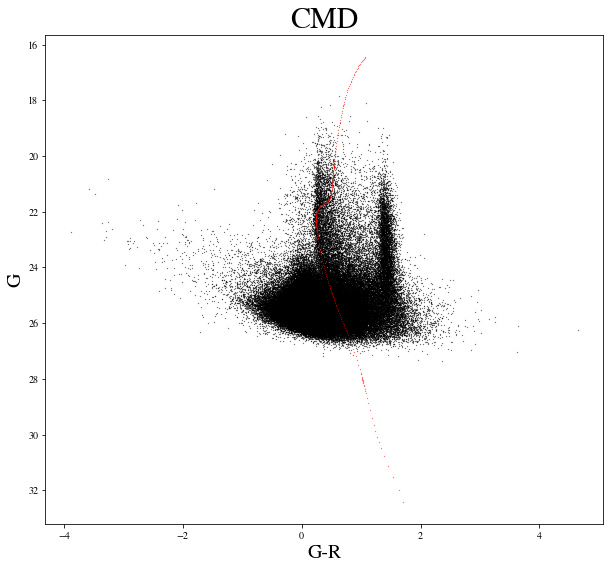

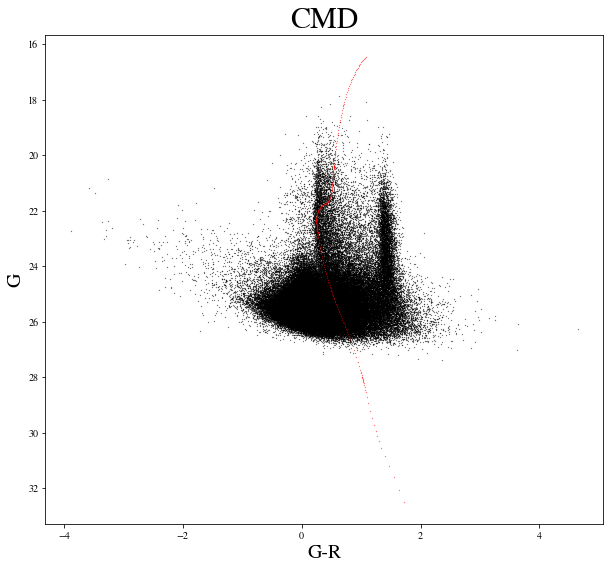

In [ ]:
isochrone_cmd(df_filtered, df_iso1)
isochrone_cmd(df_filtered, df_iso2)
isochrone_cmd(df_filtered, df_iso3)

#### Considering radius

Since we are interested in the stars that are at a certain distance of the object, we consider the stars with a radius minor than 10 arcmin.

In [ ]:
def isochrone_cmd_radius(df, df_iso, radius):
    inner_mask = df.rd <= radius

    df_inner = df.loc[inner_mask]
    x_inner = df_inner['g-r']
    y_inner = df_inner['g']
    
    df_outer = df.loc[~inner_mask]
    x_outer = df_outer['g-r']
    y_outer = df_outer['g']

    x_iso = df_iso['g-r']
    y_iso = df_iso['sdss_g']

    fig, axs = plt.subplots(1, 2, figsize=(20,9))
    axs[0].scatter(x_inner, y_inner, s=1.5, c='k')#, alpha=0.1)
    axs[0].scatter(x_iso + 0.055, y_iso + 18.35, s=2, c='r')
    
    axs[1].scatter(x_outer, y_outer, s=1.5, c='k')#, alpha=0.1)
    axs[1].scatter(x_iso + 0.055, y_iso + 18.35, s=2, c='r')
    axs[0].set_title('CMD for $r\leq$' + str(radius))
    axs[1].set_title('CMD for $r>$' + str(radius))
    for ax in axs:
        ax.set_ylabel('G')
        ax.set_xlabel('G-R')
        ax.set_xlim((-.5, 2))
        ax.set_ylim((18, 26))
        ax.set_ylim(ax.get_ylim()[::-1])

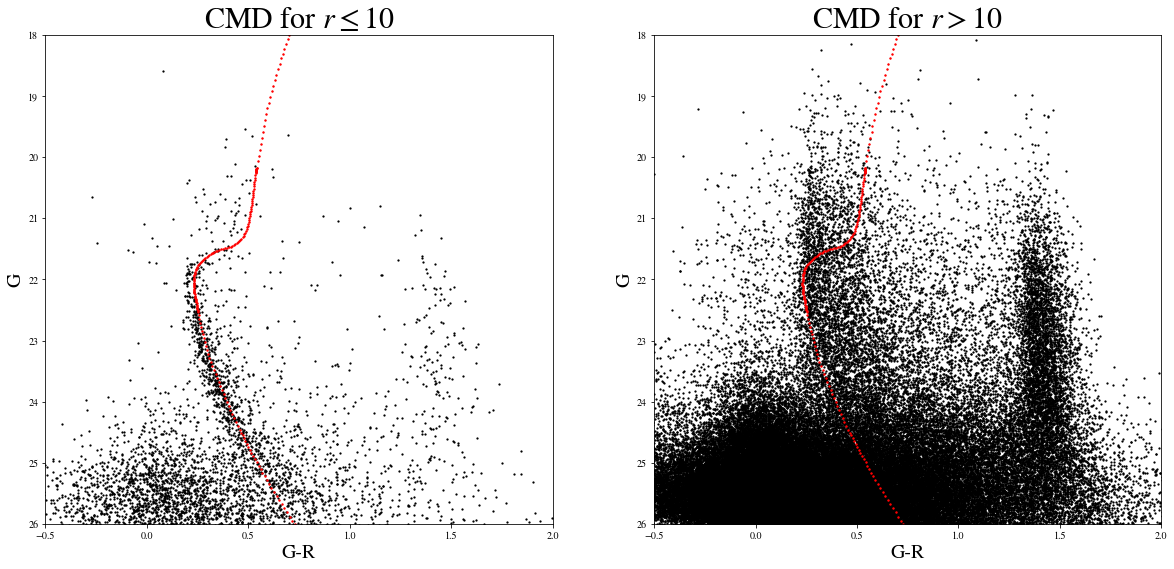

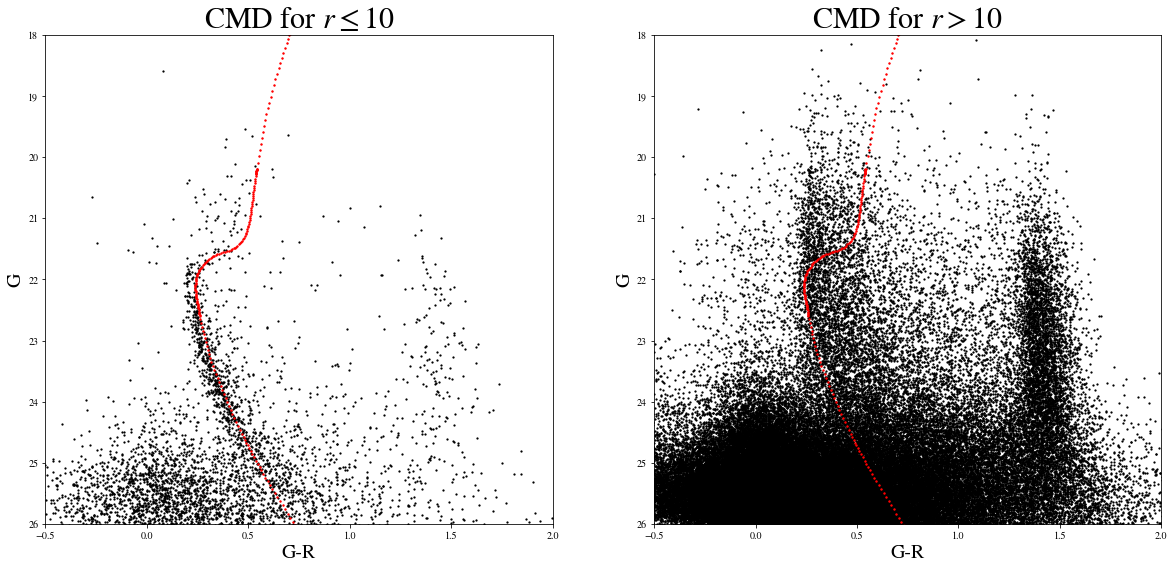

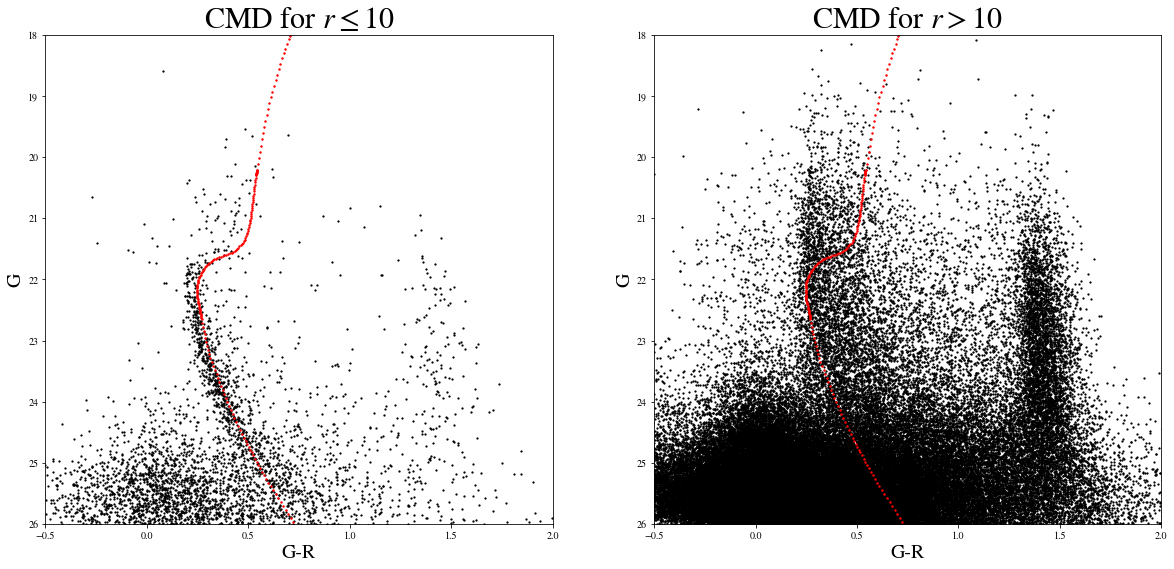

In [ ]:
inner_radius = 10

isochrone_cmd_radius(df_filtered, df_iso1, inner_radius)
isochrone_cmd_radius(df_filtered, df_iso2, inner_radius)
isochrone_cmd_radius(df_filtered, df_iso3, inner_radius)

#### Selecting stars

The idea is to give width to the isocrhone, so any object inside this region will be considered (a priori) as a star. The process will be done for an apparent magnitude between 22 and 24.5

In [ ]:
mag_mask = (df_filtered.g >= 22) & (df_filtered.r <= 24.5) 

df_new = df_filtered.loc[mask & (df_filtered.rd <= 10)]
df_new

,id,ra,dec,g,gerr,r,rerr,g-r,g_abs,r_abs,chi,sharp,rd,l,b,egr,ag,ar
0,10100003,12.447312,23.907527,24.3179,0.0195,23.8523,0.0136,0.4656,10.396952,9.931352,1.0030,-0.0490,1.846,241.707,83.585,0.0180,0.0655,0.0475
3,10100009,12.447394,23.794176,21.8796,0.0035,21.6566,0.0037,0.2230,7.958652,7.735652,1.0722,-0.0589,7.677,242.570,83.526,0.0174,0.0634,0.0460
12,10100034,12.447364,23.933602,25.1854,0.0494,24.4479,0.0355,0.7375,11.264452,10.526952,1.1522,0.0008,1.877,241.510,83.599,0.0183,0.0666,0.0483
14,10100036,12.447370,23.931447,23.1923,0.0074,22.8859,0.0061,0.3064,9.271352,8.964952,1.0427,0.0078,1.817,241.527,83.598,0.0183,0.0665,0.0482
15,10100039,12.447413,23.875267,24.7283,0.0239,23.3527,0.0091,1.3756,10.807352,9.431752,1.0441,-0.1346,3.095,241.959,83.569,0.0174,0.0632,0.0459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453117,43006332,12.437912,23.967548,25.3874,0.1008,25.6330,0.1042,-0.2456,11.466452,11.712052,1.0885,0.1790,9.879,240.660,83.505,0.0218,0.0792,0.0574
453119,43006336,12.437911,23.968727,25.5890,0.1283,25.2695,0.0739,0.3195,11.668052,11.348552,1.0220,0.1335,9.901,240.650,83.506,0.0217,0.0791,0.0574
453144,43006580,12.437838,23.957707,25.6547,0.1202,25.3915,0.0794,0.2632,11.733752,11.470552,1.0300,0.1760,9.781,240.730,83.499,0.0221,0.0803,0.0582
453221,43007192,12.437661,23.934524,25.9531,0.1141,25.6512,0.1005,0.3019,12.032152,11.730252,1.0345,0.0685,9.693,240.895,83.485,0.0225,0.0818,0.0593


In [ ]:
df_iso1.iloc[109]

#EEP       122.000000
M/Mo         0.777234
LogTeff      3.830000
LogG         4.201700
LogL/Lo      0.400200
sdss_u       4.791300
sdss_g       3.989500
sdss_r       3.802500
sdss_i       3.776600
sdss_z       3.816800
g-r          0.187000
Name: 109, dtype: float64

To find the distances between any star and the isochrone, we only need 2 columns for each dataframe, since we will be using euclidean distance.
The idea that I got, was to build a region based on two traslations of the isochrone curve. Then, evaluate which points (stars) are inside said region. To build the region, the shapely and descartes libraries were used; in order to build the region properly, first a traslation to the left was made (by 0.035 "color units") and a traslation to the right (by 0.185), but the latter needed to be reversed, since the libraries considers the order in which we present the points.


In [ ]:
from shapely.geometry.polygon import Polygon
from shapely.geometry import Point
from descartes import PolygonPatch

In [ ]:
df_left = df_iso1.copy()
df_right = df_iso1.copy()

In [ ]:
df_left['g-r'] = df_left['g-r'] - 0.035
df_right['g-r'] = df_right['g-r'] + 0.185

df_left['sdss_g'] = df_left['sdss_g'] + 18.35
df_right['sdss_g'] = df_right['sdss_g'] + 18.35

df_left = df_left[['g-r', 'sdss_g']]
df_right = df_right[['g-r', 'sdss_g']]

df_aux = df_left.append(df_right[::-1]).reset_index(drop=True) # Note the reverse order in the right!

/tmp/ipykernel_326/2518594046.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aux = df_left.append(df_right[::-1]).reset_index(drop=True) # Note the reverse order in the right!


In [ ]:
tuples = df_aux.to_numpy()
tuples = tuple(map(tuple, tuples))

pol = Polygon(tuples)
pol_patch = PolygonPatch(pol, facecolor='pink', alpha=0.3)

/home/vPedre/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


In [ ]:
def show_region(df, df_iso):
    
    x_data = df['g-r']
    y_data = df['g']

    x_iso = df_iso['g-r']
    y_iso = df_iso['sdss_g']

    fig, ax = plt.subplots(figsize=(10,9))

    ax.scatter(x_data, y_data, s=1.5, c='k')#, alpha=0.1)
    ax.scatter(x_iso + 0.055, y_iso + 18.35, s=2, c='r')
    ax.add_patch(pol_patch)

    ax.set_title('CMD for $r\leq 10$')
    ax.set_ylabel('G')
    ax.set_xlabel('G-R')

    ax.set_xlim((-.5, 2))
    ax.set_ylim((18, 26))
    ax.set_ylim(ax.get_ylim()[::-1])

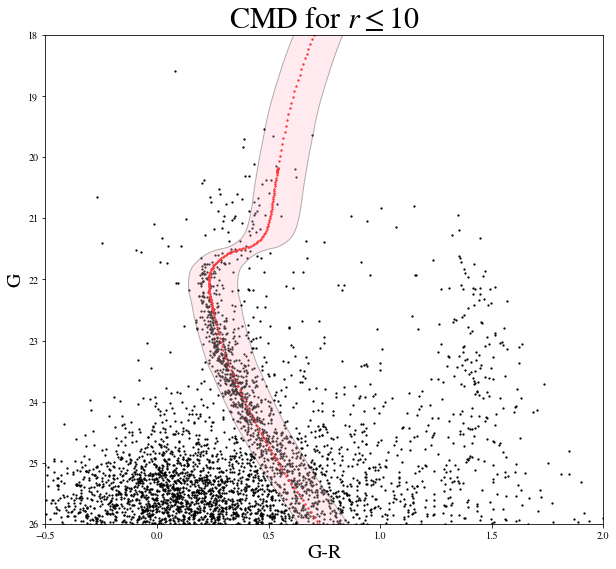

In [ ]:
show_region(df_new, df_iso1)

Now that we got the region, let's get the points inside said region.

In [ ]:
df_new[['g-r', 'g']].to_numpy()

array([[ 0.4656, 24.3179],
       [ 0.223 , 21.8796],
       [ 0.7375, 25.1854],
       ...,
       [ 0.2632, 25.6547],
       [ 0.3019, 25.9531],
       [-0.2516, 25.0244]])

In [ ]:
df_new.shape[0]

4570

In [ ]:
# Sorry for this, I can't think of a better way right now

np_points = df_new[['g-r', 'g']].to_numpy()

check_in = []

for i in range(df_new.shape[0]):
    is_in = pol.contains(Point(np_points[i]))
    check_in.append(is_in)

check_in = np.array(check_in)

In [ ]:
check_in

array([ True,  True, False, ..., False, False, False])

In [ ]:
df_new['is in'] = check_in

/tmp/ipykernel_326/2457294635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['is in'] = check_in


In [ ]:
df_stars = df_new.loc[df_new['is in'] == True]
df_stars

,id,ra,dec,g,gerr,r,rerr,g-r,g_abs,r_abs,chi,sharp,rd,l,b,egr,ag,ar,is in
0,10100003,12.447312,23.907527,24.3179,0.0195,23.8523,0.0136,0.4656,10.396952,9.931352,1.0030,-0.0490,1.846,241.707,83.585,0.0180,0.0655,0.0475,True
3,10100009,12.447394,23.794176,21.8796,0.0035,21.6566,0.0037,0.2230,7.958652,7.735652,1.0722,-0.0589,7.677,242.570,83.526,0.0174,0.0634,0.0460,True
14,10100036,12.447370,23.931447,23.1923,0.0074,22.8859,0.0061,0.3064,9.271352,8.964952,1.0427,0.0078,1.817,241.527,83.598,0.0183,0.0665,0.0482,True
33,10100078,12.447414,23.965181,22.1762,0.0042,22.0324,0.0037,0.1438,8.255252,8.111452,1.0539,0.0906,3.203,241.271,83.616,0.0186,0.0676,0.0490,True
40,10100095,12.447428,23.970477,23.5945,0.0131,23.2100,0.0089,0.3845,9.673552,9.289052,1.0174,0.0486,3.476,241.231,83.619,0.0186,0.0677,0.0491,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452541,42913884,12.439780,23.905933,25.3447,0.1115,24.7737,0.0680,0.5710,11.423752,10.852752,0.9475,0.0495,7.946,241.243,83.495,0.0211,0.0770,0.0558,True
452776,43002736,12.438908,23.996848,21.9883,0.0052,21.7639,0.0044,0.2244,8.067352,7.842952,1.1235,0.0915,9.802,240.497,83.532,0.0205,0.0746,0.0541,True
452785,43002832,12.438867,23.965289,25.2700,0.0774,24.7577,0.0485,0.5123,11.349052,10.836752,1.0750,0.0875,9.089,240.736,83.515,0.0212,0.0773,0.0561,True
452881,43004100,12.438531,23.974962,23.1644,0.0128,22.8425,0.0094,0.3219,9.243452,8.921552,1.0890,-0.0445,9.540,240.641,83.516,0.0212,0.0771,0.0560,True
